## Hypotheis testing,ANOVA testing and Prediction of third year expenses from two years expenses using SciPy

In [22]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#loading dataset
data=pd.read_excel('/content/drive/MyDrive/minp.xlsx')
group_A=data['Year1']
group_B=data['Year2']
a=np.mean(group_A)
b=np.mean(group_B)
c=b-a

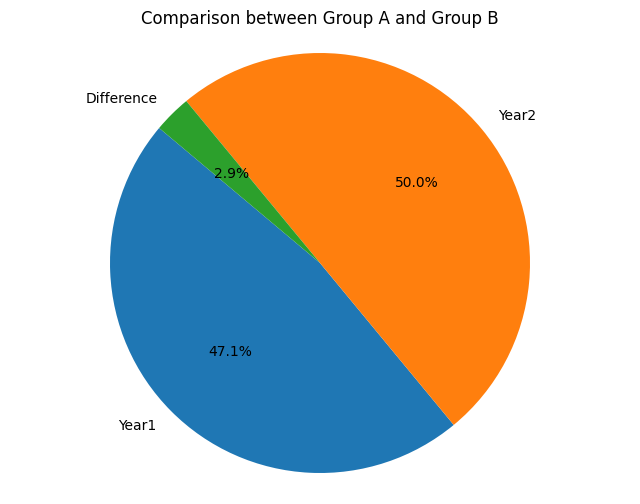

In [14]:
# Plotting the pie chart
labels = ['Year1', 'Year2', 'Difference']
sizes = [a, b, c]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparison between Group A and Group B')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
#hypothesis testing
t_stat,p_value=stats.ttest_ind(group_A,group_B)
print("t-statistic:",t_stat)
print("p-value",p_value)

t-statistic: -0.09266649544056856
p-value 0.9268788677775801


In [16]:
#ANOVA testing
f_stat,p_value=stats.f_oneway(data['Year1'],data['Year2'])
print("F-statistics:",f_stat)
print("p-value",p_value)

F-statistics: 0.0085870793772369
p-value 0.926878867777582


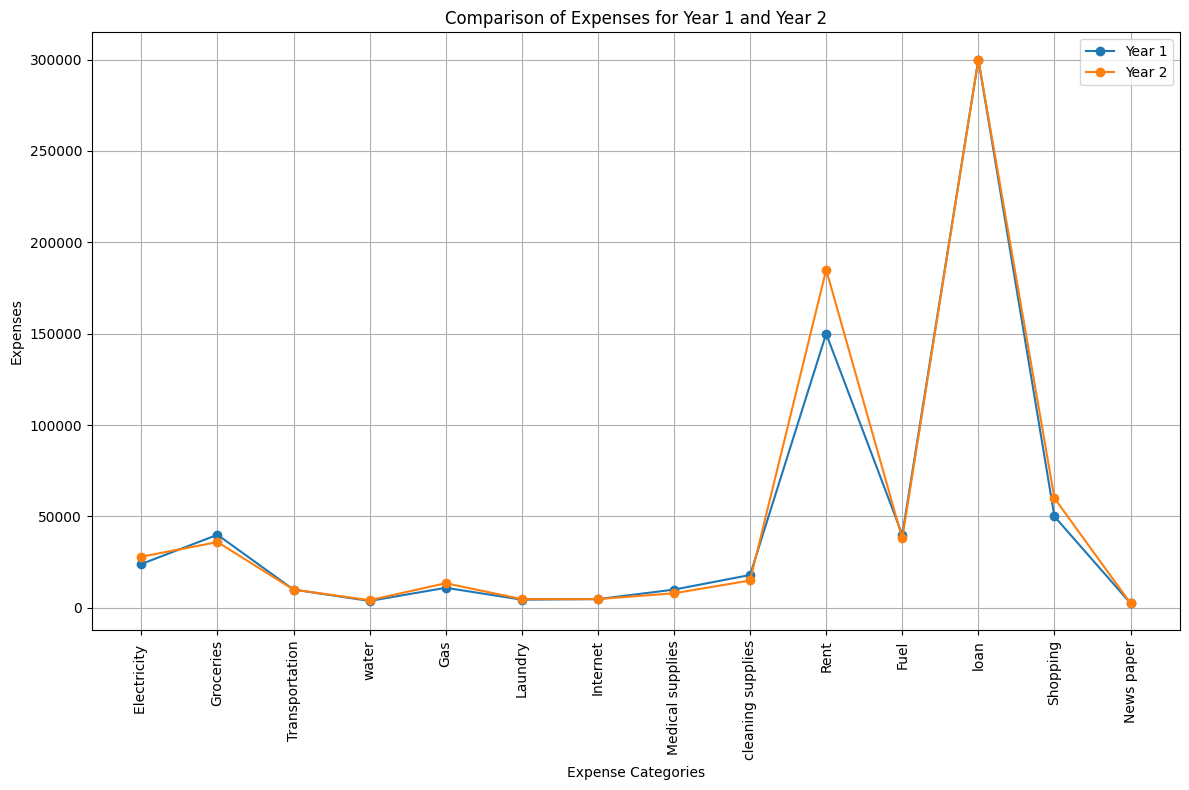

In [17]:
# Expense categories
categories = data['Expenses']
# Expenses for Year 1 and Year 2
expenses_year1 = data['Year1']
expenses_year2 = data['Year2']
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(categories, expenses_year1, marker='o', label='Year 1')
plt.plot(categories, expenses_year2, marker='o', label='Year 2')
plt.xlabel('Expense Categories')
plt.ylabel('Expenses')
plt.title('Comparison of Expenses for Year 1 and Year 2')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#prediction
expenses_year1 = data['Year1']
expenses_year2 = data['Year2']
#sample mean and standard deviation for the two years
mean_expenses = np.mean(np.concatenate((expenses_year1 ,expenses_year2 )))
std_dev = np.std(np.concatenate((expenses_year1 ,expenses_year2 )))
#desired confidence level
confidence_level = 0.1
# Calculate degrees of freedom
n = len(expenses_year1)
df = 2*n-2
# calculating the range
lower_bound, upper_bound = t.interval(confidence_level, df, loc=mean_expenses, scale=std_dev / np.sqrt(n))
print("Range for First-year mean expenses:", round(np.mean(group_A), 2))
print("Range for Second-year mean expenses:", round(np.mean(group_B), 2))
# Predicted range for third-year mean expenses
print(f"Predicted range for third-year mean expenses: ({lower_bound:.2f} - {upper_bound:.2f})")

Range for First-year mean expenses: 47758.57
Range for Second-year mean expenses: 50701.43
Predicted range for third-year mean expenses: (46483.66 - 51976.34)
